In [1]:
import pandas as pd
import numpy as np

## Stack vs unstack

`df.stack()` - работает, когда в колонках есть мультииндекс. Позволяет один из уровней колонок переместить в строки.

`df.unstack()` - работает, когда в строках есть мультииндекс. Перемещает индекс строк в колонки.

In [2]:
multicol1 = pd.MultiIndex.from_tuples([('speed', 'kmh'),
                                       ('speed', 'mph')])

df_multi_level_cols1 = pd.DataFrame([[7, 9], [18, 25]],
                                    index=['Aston Martin', 'Bentley'],
                                    columns=multicol1)

df_multi_level_cols1

speed    
               kmh mph
Aston Martin     7   9
Bentley         18  25

In [3]:
df_one_level = df_multi_level_cols1.stack()
df_one_level

C:\Users\danil\AppData\Local\Temp\ipykernel_8292\226213042.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_one_level = df_multi_level_cols1.stack()


speed
Aston Martin kmh      7
             mph      9
Bentley      kmh     18
             mph     25

In [4]:
df_multi_level_cols2 = df_one_level.unstack()
df_multi_level_cols2

speed    
               kmh mph
Aston Martin     7   9
Bentley         18  25

## [Melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

Если в датафрейме есть много похожих колонок (A1, A2, ...), то мы можем агрегировать данные в две колонки: variable (значения - A1, A2, ...) и value (соответствующее значение). Пример:

In [5]:
df = pd.DataFrame({
    "A": ['a', 'b', 'c'],
    "B": [1, 3, 5],
    "C": [2, 4, 6]
})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [6]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [7]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


## [Pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

Операция, противоположная `melt`. Если у нас есть колонка с категориальными значениями, мы можем сделать новую таблицу, где категории превратятся в колонки.

In [8]:
df = pd.read_csv('../data/piviot_table.csv', sep=',', index_col=0)
df

FileNotFoundError: [Errno 2] No such file or directory: '../data/piviot_table.csv'

In [ ]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc=np.sum)
table

## [Explode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)

Функция полезна, когда в ячейке таблицы оказывается список. Позволяет "раскрыть" список и записать его в несколько строк.

In [ ]:
df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
df

In [ ]:
df.explode('A')

## Задача

Дан датасет по заболеваемости коронавирусом с такими колонками: `date`, `continent`, `new_cases`.

In [ ]:
df = pd.read_csv('../data/covid-19cases.csv', index_col=0)
df = df[df['date'] != 'For Notes: ']
df = df[['date', 'continent', 'new_cases']]
df = df.dropna()
df

### Задача 1

Посчитать сколько людей суммарно заболело на каждом континенте.

In [ ]:
# ваш код

### Задача 2

Посчитать корреляцию между заболеваниями на разных континентах.

Корреляцию можно посчитать при помощи some_df.corr(), но тогда в индексе должны быть даты, а в колонках названия континентов.

In [ ]:
# Ваш код

## Задача по игре престолов

Есть открытый API по вселенной Игры Престолов - https://anapioficeandfire.com/

Порешаем задачи с ним.

In [ ]:
import requests

response = requests.get('https://anapioficeandfire.com/api/books?pageSize=50')
df = pd.DataFrame(response.json())
df = df[['name', 'characters']]
df.head()

In [ ]:
df.iloc[5].characters[:5]  #список значений

In [ ]:
df.characters[0]

### Задача 3

Найти персонажа, который встречается в максимальном количестве книг.

In [ ]:
df.explode('characters').groupby('characters').count().idxmax().apply(lambda x: x.split('/')[-1]).values[0]

# [Matplotlib](https://matplotlib.org/stable/index.html)

## Установка

```
conda install matplotlib
```

In [9]:
import matplotlib.pyplot as plt

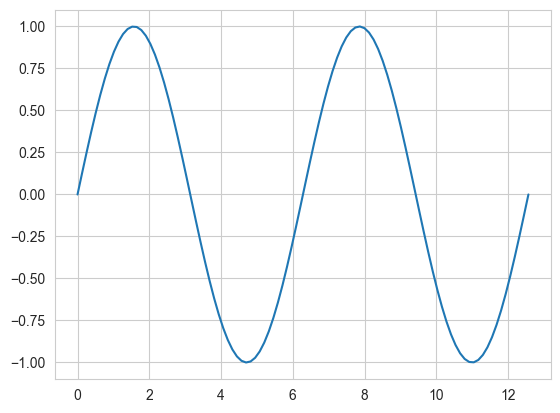

In [10]:
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y);

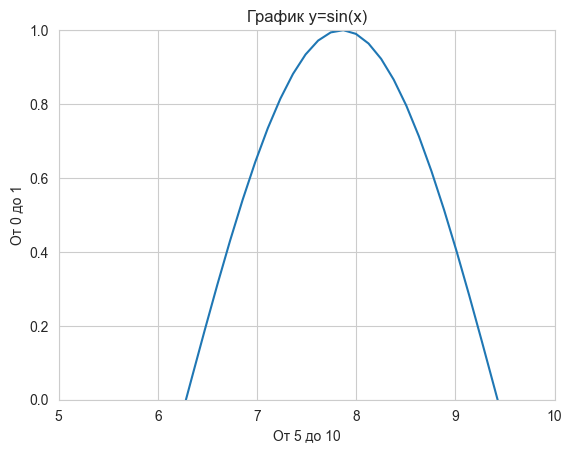

In [11]:
plt.plot(x, y)
plt.xlim(5, 10)
plt.ylim(0, 1)
plt.title("График y=sin(x)")
plt.ylabel("От 0 до 1")
plt.xlabel("От 5 до 10");

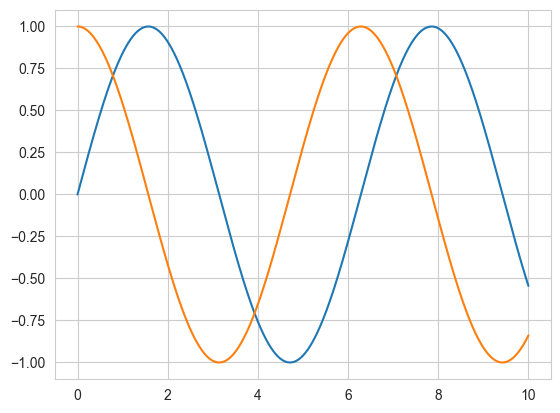

In [12]:
x = np.linspace(0, 10, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2);

График рассеивания

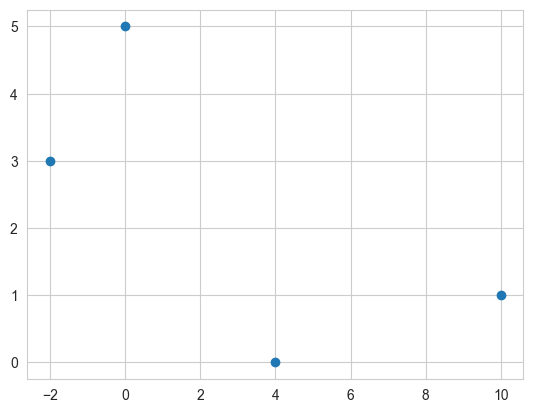

In [13]:
dots = np.array([
    (0, 5),
    (4, 0),
    (-2, 3),
    (10, 1),
])

plt.scatter(dots[:, 0], dots[:, 1]);

Подграфики

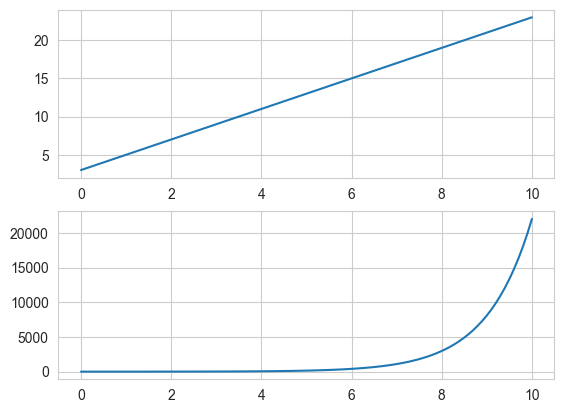

In [14]:
fig, axs = plt.subplots(2)

x = np.linspace(0, 10, 100)
y1 = x * 2 + 3
y2 = np.exp(x)
axs[0].plot(x, y1)
axs[1].plot(x, y2)

## Задача

Нарисовать $n$ линий.

Написать функцию, которая на вход принимает параметр $n$ и рисует $n$ графиков по такому приципу:

$$y = x$$
$$y = 2x$$
$$y = 3x$$
$$...$$
$$y = nx$$

Здесь можно использовать циклы.

Подсказка: сначала можно написать код для рисования одной линии, потом решить задачу, а в конце обернуть в функцию

In [15]:
def draw_n_lines(n):
    x = np.array([0, 1])
    for i in range(1, n + 1):
        plt.plot(x, i * x, label=f'y={i}x' if i > 1 else f'y=x')
    plt.legend(loc=2)

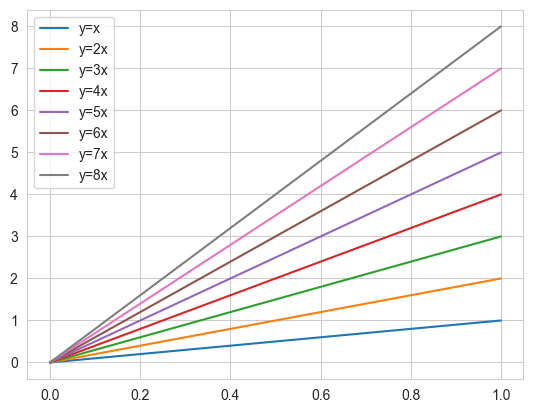

In [16]:
draw_n_lines(8)

## Задача

По заданным точкам нарисовать квадрат.

In [17]:
square_coord = [
    (0, 0),
    (1, 0),
    (1, 1),
    (0, 1)
]

def square(coords):
    n = len(coords)
    xmin = min(coords, key=lambda x: x[0])[0]
    xmax = max(coords, key=lambda x: x[0])[0]
    ymin = min(coords, key=lambda x: x[1])[1]
    ymax = max(coords, key=lambda x: x[1])[1]
    fig = plt.figure(figsize =(5, 4))
    ax = fig.add_axes([1, 1, 1, 1])
    print(xmin, xmax, ymin, ymax)
    ax.set_xlim(xmin - 1, xmax + 1)
    ax.set_ylim(ymin - 1, ymax + 1)
    X = []
    Y = []
    for i in range(n):
        x1, y1 = coords[i % n]
        x2, y2 = coords[(i + 1) % n]
        X.append([x1, x2])
        Y.append([y1, y2])
    ax.plot(X, Y, color='black')
    plt.show()

0 1 0 1


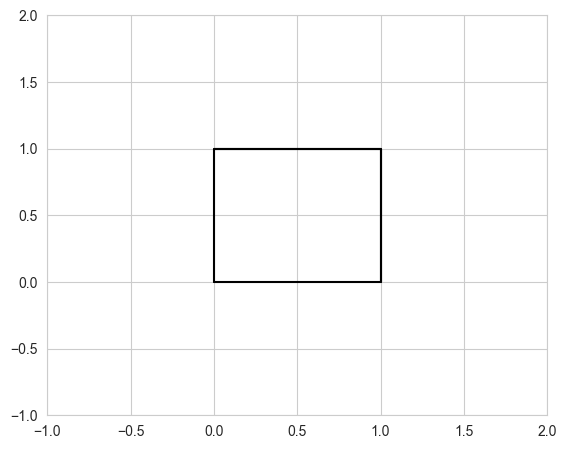

In [18]:
square(square_coord)

## Задача

Адаптировать код из задачи выше для того, чтобы он рисовал любую замкнутую фигуру.

Например, можно убрать одну любую точку и должен получиться треугольник

0 3 0 2


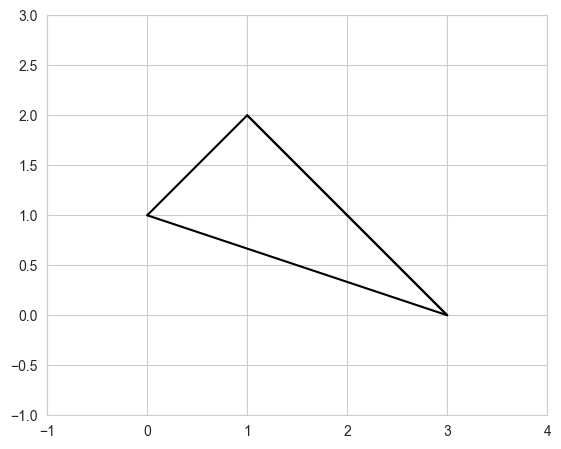

In [19]:
trinagle = [[0, 1], [1, 2], [3, 0]]
square(trinagle)

## Задача

Дана СЛАУ второго порядка, нужно отобразить на графике линии и точку их пересечения

$$a_{11}x + a_{12}y = b_1$$
$$a_{21}x + a_{22}y = b_2$$



In [20]:
A = np.array([[1, 0], [0, 1]])
b = np.array([3, 2])

ДЗ для заинтересованных - сделать виджет для управления коэфициентами системы и автоматической перестройки графиков

[Пример с кодом](https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets)

# Seaborn
Seaborn — это библиотека для создания статистических графиков на Python. Она основывается на matplotlib и тесно взаимодействует со структурами данных pandas.

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (11.7, 8.27)})  # Увеличить размер графика

В seaborn есть встроенные датасеты для демонстрации. Воспользуемся набором данных о рейсах самолетов 

In [ ]:
flights_data = sns.load_dataset("flights")
flights_data.head()

## Диаграмма рассеяния — Scatter Plot
Диаграмма рассеяния — это диаграмма, которая отображает точки на основе двух измерений набора данных. Создать диаграмму рассеяния в seaborn очень просто, ведь для этого нужна всего одна строчка кода.

In [ ]:
sns.scatterplot(data=flights_data, x="year", y="passengers")

## Линейный график — Line Plot

Этот график рисует линию, которая представляет собой развитие непрерывных или категориальных данных. Этот вид графиков популярен и известен, и его легко создать. Как и раньше, мы воспользуемся функцией lineplot с набором данных и столбцами, представляющими оси x и y. Остальное за нас сделает seaborn.

In [ ]:
sns.lineplot(data=flights_data, x="year", y="passengers")

## Столбчатая диаграмма — Bar Plot
Наверное, это самый известный тип диаграммы, и, как вы уже догадались, мы можем построить этот тип диаграмм с помощью seaborn, также, как мы сделали это для линейного графика и диаграммы рассеяния, с помощью функции barplot.

In [ ]:
sns.barplot(data=flights_data, x="year", y="passengers")

## Расширение функционала с matplotlib
Seaborn основывается на matplotlib, расширяя ее функциональные возможности и абстрагируя сложность. При этом seaborn не теряет в своей мощности. Любая диаграмма seaborn может быть кастомизирована с помощью функций из библиотеки matplotlib. Эта механика может пригодиться в определенных случаях и позволяет seaborn использовать возможности matplotlib без необходимости переписывать все ее функции.

Допустим, вы хотите построить несколько диаграмм одновременно с помощью seaborn, в этом случае вы можете воспользоваться функцией subplot из matplotlib.

С помощью функции subplot на одном графике можно построить несколько диаграмм. Функция принимает в себя три параметра: первый – количество строк, второй – количество столбцов, третий – количество диаграмм.

Мы визуализируем по одной диаграмме seaborn на каждой части графика, смешивая функционал matplotlib и seaborn


In [ ]:
diamonds_data = sns.load_dataset('diamonds')
plt.subplot(1, 2, 1)
sns.countplot(x='carat', data=diamonds_data)
plt.subplot(1, 2, 2)
sns.countplot(x='depth', data=diamonds_data)

## Создание красивых графиков с помощью стилей
Seaborn дает возможность менять интерфейс ваших графиков. Для этого из коробки у нас в распоряжении есть пять стилей: darkgrid, whitegrid, dark, white и ticks.

In [ ]:
sns.set_style("darkgrid")
sns.lineplot(data=flights_data, x="year", y="passengers")

In [ ]:
sns.set_style("whitegrid")
sns.lineplot(data=flights_data, x="year", y="passengers")

## Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

### Hard (+ в карму)

Вы - аналитик в магазине. Маркетологи сказали, что следующую компанию хотели бы запустить на целевую аудиторию магазина.

Предложите подход как понять, что такое "целевая аудитория", обоснуйте его при помощи данных и найдите ID покупателей, которые относятся к ним.